# Introduction

We are **Vector Nation**. Composed of the following:
- Ariaga, Marian
- Clemente, Francis
- De Guzman, Evan
- Villaflores, Charlize

Taking STINTSY, section S16 under Sir Alvin Alon. 

This **Major Course Output (MCO)** aims to solve a classification task using the Philippine Statistics Authority or PSA's <span style="color:green">**Family Income and Expenditure dataset**.</span> 

### The Task

In specificity, the group aims to create train and test a machine learning model that can classify employment status based on education level and

We will use these three algorithms: 
- kNN Clustering Algorithm
- Linear Regression and Logistic Regression
- Neural Networks

# Description of the Data Set

Once again, the data set that we will use is  <span style="color:green">**Family Income and Expenditure dataset**.</span>. The original data set has an enormous 119 variables to use.
The 2012 Family Income Expendture Survey (FIES) was adopted from the 2009 Philippine Classification of Individual Consumption According to Purpose (PCOICOP).  

The **2012 FIES** is a sample survey designed to provide income and expenditure data for the country and its seventeen regions. They are basic sources of information on human development for policies and programs of the government. 

The unit of analysis in the dataset were households, implying the survey referred to characteristics of population residing in private households. 

### Dataset Features

Show below is the table that shows the variables in the first column and the definition of their data in Column 2
| Abbreviation | Definition |
|:--------:|:--------|
W_REGN | Region
W_OID | Other ID
W_SHSN | Sample household serial number
W_HCN | Household control number
URB | Urban / Rural
RSTR | Stratum
PSU | PSU number
BWEIGHT | Base weight
RFACT | Final weight
FSIZE | How many members are there in the family?
AGRI_SAL | Did you or any member of your family receive salaries and wages from employment in agricultural sectors, in cash (including allowances, honoraria, tips, bonus, commissions) and in kind (including housing, food, grocery, clothing and medical benefits)? How much?
NONAGRI_SAL | Did you or any member of your family receive salaries and wages from employment in non-agricultural sectors, in cash (including allowances, honoraria, tips, bonus,commissions) and in kind (including housing, food, grocery, clothing and medical benefits)? How much?
WAGES | Salaries and wages from both agricultural and non-agricultural activities
NETSHARE | Did you or any member of your family receive net share of crops, fruits and vegetables produced, fishing or livestock and poultry raised by other households? If yes, how much was sold for cash or consumed by the family?
CASH_ABROAD | Did you or any member of your family receive cash, gift or other form of assistance from abroad? How much?
CASH_DOMESTIC | Did you or any member of your family receive cash, gift, support, assistance or relief from domestic source? How much?
RENTALS_REC | Did you or any member of your family receive in cash or in kind, rentals from non-agricultural lang, buildings, spaces or other properties? How much?
INTEREST | Did you or any member of your family receive in cash or in kind, interest from bank deposits and loans extended to other families? How much?
PENSION | Did you or any member of your family receive in cash or in kind, pension and retirement, workmen’s compensation, or social security benefits? How much?
DIVIDENDS | Did you or any member of your family receive in cash or in kind, any dividend from investments (stock, bonds, etc.)? How much?
OTHER_SOURCE | Did you or any member of your family receive in cash or in kind, other sources of income not elsewhere classified such as royalties and income of family members below 10 years old? How much?
NET_RECEIPT | Total net receipts from family sustenance activity
REGFT | Total received as gifts
NET_CFG | Net income from crop farming and gardening
NET_LPR | Net income from livestock and poultry raising
NET_FISH | Net income from fishing
NET_FOR | Net income from forestry and hunting
NET_RET | Net income from wholesale and retail
NET_MFG | Net income from manufacturing
NET_COM | Net income from community, social, recreational, and personal services
NET_TRANS | Net income from transportation, storage, and communication services
NET_MIN | Net income from mining and quarrying
NET_CONS | Net income from construction
NET_NEC | Net income from entrepreneurial activities not elsewhere classified
EAINC | Total income from entrepreneurial activities. Computation: EAINC = NET_CFG + NET_LPR + NET_FISH + NET_FOR + NET_RET + NET_MFG + NET_COM + NET_TRANS + NET_MIN + NET_CONS + NET_NEC
TOINC | Total income. Computation: TOINC = WAGES + NETSHARE + CASH_ABROAD + CASH_DOMESTIC + RENTALS_REC + INTEREST + PENSION + DIVIDENDS + OTHER_SOURCE + NET_RECEIPT + REGFT + EAINC + T_IMPUTED_RENT
LOSSES | Losses from entrepreneurial activities.
T_BREAD | Total food expenditure for bread and cereals. This category includes rice in all forms, corn, wheat, barley, oats, and other cereal in the form of grain or flour, bread and other bakery products, mixes and dough for preparation of bakery products, pasta products in all forms, cereal preparations, farinaceous-based products prepared with meat, fish, seafood, cheese, vegetables and fruits.
T_MEAT | Total food expenditure for meat. This category includes fresh, chilled or frozen meat (meat of cattle, pig, goat, chicken, duck, goose, turkey, rabbit, quail, etc.); fresh, chilled or frozen edible offal like liver, gizzard; dried, salted or smoked; preserved or processed meat, and meat-based preparations (tocino, tapa hotdog, longaniza, chorizo, corned beef, luncheon meat, meatloaf, embotido, sausages, bacon, salami, ham, etc.).
T_FISH | Total food expenditure for fish and seafood. This category includes (1) fish, fresh, chilled or frozen; (2) dried, smoked or salted fish; (3) fresh, chilled or frozen seafoods; (4)fish otherwise prepared or preserved, canned or bottled; and (5) seafood-based preparations, canned or bottled.
T_MILK | Total food expenditure for milk, cheese, and eggs. This category includes (1) raw milk; (2) pasteurized and sterilized milk; (3) condensed, evaporated or powdered milk; (4) yoghurt, cream, milk-based beverage and other similar milkbased products; (5) cheese and curd; and (6) egg and egg products made wholly from eggs. This category also includes milk, cream and yoghurt containing sugar, cocoa, fruit or flavorings, dairy products not based on milk such as soya milk.
T_OIL | Total food expenditure for oil and fats. This category includes (1) butter and butter products (butter oil, etc.); (2) margarine (including “diet” margarine) and other vegetables fats (including peanut butter); (3) edible oils (corn, coconut oil including milk or Gata powder, canola oil, soya bean oil, peanut oil, etc.); and (4) edible animal fats (lard, etc.).
T_FRUIT | Total food expenditure for fruits. This category includes (1) fresh, chilled or frozen fruit like pineapple, mango, banana, papaya, dalanghita, etc.; (2) dried fruit or preserved, fruit nuts and edible seeds (peanut, cashew nut, coconut, etc.); and (3) preserved fruit and fruit-based products.
T_VEG | Total food expenditure for vegetables. This category includes (1) vegetables cultivated for their leaves or stalks (fresh chilled or frozen); (2) vegetables cultivated for heir fruit (fresh, chilled, frozen or dried); (3) vegetables cultivated for their roots (fresh, chilled or dried); (4) potatoes and tubers vegetables (fresh or dried); (5) vegetables preserved or processed and other vegetable-based products; and(6) products of tuber vegetables including preparations.
T_SUGAR | Total food expenditure for sugar, jam, honey, chocolate, and confectionery. This category includes (1) cane or beet sugar, unrefined or refined; (2) jams, marmalades, fruit jellies, natural and artificial honey, maple syrup, molasses, and parts of plants preserved in sugar; (3) chocolate in bars or slabs; (4) chewing gum, sweets, toffees, and other confectionery products; (5) cocoa-based foods and cocoa-based desert preparations; (6) ice cream, sorbet and edible ice; and (7) artificial sugar substitutes.
T_FOOD_NEC | Total food expenditure for other food not elsewhere classified. This category includes salt, spices, culinary herbs, sauces, condiments, seasonings, prepared baking powder, baking yeast, dessert preparations, soups, broths, stocks, culinary ingredients, homogenized baby food, and dietary preparations irrespective of the preparation.
T_COFFEE | Total food expenditure for coffee, cocoa, and tea. This category includes (1) coffee, whether or not decaffeinated; (2) roasted ground, including instant coffee, tea, and other plant products for infusions (green tea, black tea, pito pito, etc.); (3) cocoa, whether or not sweetened; (4) chocolate-based powder (milo, ovaltine, etc); (5) cocoa-based beverage preparations; (6) coffee and tea substitutes; and (7) extract and essences of coffee and tea (ricoa, cocoa, tablea, cocoa beans, etc.).
T_MINERAL | Total food expenditure for mineral water, soft drinks, fruit juices, and vegetable juices. This category includes (1) all drinking water sold in container such as mineral or spring water; (2) soft drinks such as soda, lemonade, and colas; (3) fruit and vegetables juices (pineapple juice, mango juice, orange juice, etc.); (4) syrup and concentrates for the preparation of beverages; and (5) other non-alcoholic beverages such as energy drink like Lipovitan, Red Bull, Joss, Gatorade, cobra, etc.
T_ALCOHOL | Total food expenditure for alcoholic beverages. This category includes alcoholic beverages for consumption at home. This subsection includes low or non-alcoholic beverages which are generally alcoholic such as non-alcoholic beer.
T_TOBACCO | Total food expenditure for tobacco. This category covers all purchases of tobacco by households, including purchases of tobacco in restaurants, cafes, bars, service stations, etc.
T_OTHER_VEG | Total food expenditure for other vegetable-based products. This category includes other vegetable-based products such as betel leaves, betel nuts, mint leaf and lime, etc.
T_FOOD_HOME | Total food expenditure for food consumed at home. Computation: T_FOOD_HOME = T_BREAD + T_MEAT + T_FISH + T_MILK + T_OIL + T_FRUIT + T_VEG + T_FOOD_NEC + T_SUGAR + T_COFFEE + T_MINERAL
T_FOOD_OUTSIDE | Total food expenditure for food regularly consumed outside of home, i.e., in restaurants, cafes, and canteens.
T_FOOD | Total food expenditure. Computation: T_FOOD = T_FOOD_HOME + T_FOOD_OUTSIDE
T_CLOTH | Total expenditure for clothing and footwear
T_FURNISHING | Total expenditure for furnishings and household equipment or for payments for service fees or routine house maintenance
T_HEALTH | Total expenditure for medical products such as drugs and medicines, medical appliances and equipment or payment for any outpatient and inpatient medical services.
T_HOUSING_WATER | Total expenditure for Housing, Water, Electricity, Gas and Other Fuels. this category includes actual rentals for housing (T_ACTRENT), imputed rentals for housing (T_IMPUTED_RENT), maintenance and repair of the dwelling, water supply and miscellaneous services relating to the dwelling and electricity, gas and other fuels.
T_ACTRENT | Actual house rent. How much is the actual payment for the house/lot?
T_RENTVAL | House rent / rental value. Computation: T_RENTVAL = T_ACTRENT + T_IMPUTED_RENT + T_BIMPUTED_RENT
T_IMPUTED_RENT | Imputed house rental value
T_BIMPUTED_RENT | Imputed housing benefit rental value
T_TRANSPORT | Total expenditure for transportation including (1) purchase of vehicles; (2) operation of personal transport equipment such as spare parts and accessories, fuels and lubricants; (3) maintenance and repair; (4) services such as toll fees, driving lessons etc.; (5) amount spent on the regular trips made by the family members to and from the office, school, market, church, etc.; and (6) and, sea or air travel for personal purposes of any member of the family during the reference period whether the travel is within or to/from a destination outside the country.
T_COMMUNICATION | Total expenditure for communication. This includes any telephone or telefax equipment, or payment for service fees for postal services and telephone and telefax services.
T_RECREATION | Total expenditure for recreation. This includes all expenses incurred in (1) acquiring equipment for reception, recoding, and reproduction of sound and pictures such as television sets, radio, CD, VCD, DVD, microphones, sing along system, etc.; (2) information processing equipment such as personal computers, printers, calculators, etc.; (3) musical instruments and major durables such as pianos, guitars, violins, etc.; (4) games, toys and hobbies such as card games, chess sets, dolls, etc., and (5) purchase books, newspaper and periodicals, and stationery and drawing materials such as writing pads, envelopes, pens, pencils fountain pens, etc.
T_EDUCATION | Total expenditure for education. This includes (1) tuition, and matriculation (2) allowances given to family members studyingaway from home; (3) school uniform and footwear; (4) computer rental services; (5) printing services; (6) graduation fees, internship fees, payment of yearbooks and other school contribution.
T_MISCELLANEOUS | Total expenditure on miscellaneous goods and services. This includes (1) services for hairdressing salon and barbershop; (2) purchase of articles and products for personal hygiene such as toilet soap, shampoo, toothpaste; and (3) purchase of beauty products such as lipstick, make up, etc., during the past month.
T_OTHER_EXPENDITURE | Total other expenditure. This includes (1) premiums for insurance; (2) interest payment on loans for living expenses; (3) losses due to fire and theft; (4) legal fees and membership fees to legal associations and/or professional organizations, etc., and (5) amount deducted from salary as payment for PHILHEALTH, GSIS or SSS insurance, PAG-IBIG membership, etc.
T_OTHER_DISBURSEMENT | Total other disbursements. This refers to non-family expenditures, which may give an indication of savings on the part of the family. These include purchase or amortization of real property, payments of cash loan (principal), installments of appliances bought before 2012, installments for personal transport bought before 2012, loans granted to persons outside the household, amount deposited in banks or investments and major repair or construction of a house.
T_NFOOD | Total non-food expenditure
T_TOTEX | Total expenditure. Computation: T_TOTEX = T_FOOD+T_NFOOD
T_TOTDIS | Total disbursements. Computation: T_TOTDIS = T_TOTEX + T_OTHER_DISBURSEMENT
T_OTHREC | Total other receipts. These are non-income receipts comprising of (1) value at cost of real and personal property sold; (2) loans from other households, business firms and government institutions; (3) payments for loans granted to others; (4) and withdrawals from savings or business equity. Profits from sale of stocks and bonds, back pay and proceeds from insurance, net winnings from gambling, sweepstakes and lotteries and inheritance are also included as other receipts.
T_TOREC | Total receipts. Computation: T_TOREC = T_OTHREC + TOINC
SEX | Sex of the head of the family
AGE | Age of the head of the family as of date of interview
MS | Marital status of the head of the family
HGC | Highest grade completed of the head of the family
JOB | Did the head of the family have a job or business during the past six months?
OCCUP | Primary occupation of the head of the family during the past six months
KB | Kind of business / industry of the head of the family during the past six months
CW | Class of worker of the head of the family during the past six months
HHTYPE | Type of household
MEMBERS | Number of family members
AGELESS5 | Number of family members below 5 years old
AGE5_17 | Number of family members between 5 to 17 years old
EMPLOYED_PAY | Number of family members employed for pay during the past six months
EMPLOYED_PROF | Number of family members employed for profit during the past six months
SPOUSE_EMP | Did the spouse of the head of the family have a job or business during the past six months?
BLDG_TYPE | Type of building of the house
ROOF Type | Type of roof of the house
WALLS Type | Type of walls of the house
TENURE | Tenure status of the housing unit and lot occupied by the family
HSE_ALTERTN | Where there any alterations or additions to the house or other major renovations done in the housing unit during the past six months?
TOILET | Kind of toilet facilities used by the family in the house
ELECTRIC | Is there any electricity in the building/house?
WATER Main | source of water supply of the family
DISTANCE | Distance of the house from the water source
RADIO_QTY | Number of radios
TV_QTY | Number of TVs
CD_QTY | Number of CD / VCD / DVD
STEREO_QTY | Number of component / stereo set
REF_QTY | Number of refrigerator / freezers
WASH_QTY | Number of washing machines
AIRCON_QTY | Number of air conditioners
CAR_QTY | Number of cars, jeeps, vans
LANDLINE_QTY | Number of landline / wireless telephones
CELLPHONE_QTY | Number of cellular phones
PC_QTY | Number of personal computers
OVEN_QTY | Number of stoves with oven / gas range
MOTOR_BANCA_QTY | Number of motorized bangka
MOTORCYCLE_QTY | Number of motorcycle / tricycles
POP_ADJ | Population adjustment
PCINC | Per capita income
NATPC | National per capita income decile
NATDC | National income decile
REGDC | Regional income decile
REGPC | Regional per capita income decile

### Data Collection Process

The PSA has stated that the data collection has two cycles, one starting on July of 2012 and ending on the end of the month. The next cycle started on January of 2013 and ended by end of month. The data was collected face to face. 

Participants were given questionnaires. The questionnaire collects information on family income, source of income, family expenditure and other related and relevant information regarding family income and expenditure levels in the Philippines.

# List of Requirements

<span style="color:red">**#TODO**</span> Update accordingly depending on what we use in the entirety of the notebook.

# Data Cleaning and Pre-Processing

Loading in Prerequisites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


KeyboardInterrupt: 

Loading in the csv dataset and splitting into the important features for this classifcaiton problem.



In [ ]:
df = pd.read_csv("FIES PUF 2012 Vol.1.CSV")

print(df[["JOB"]])

NameError: name 'pd' is not defined

Just to confirm, we can see

In [ ]:
class_df = df[["CW", "PCINC", "JOB", "OCCUP", "HGC"]] 
# add highest grade, remove TENURE, WAGES

print("Total length of a dataset is: ", len(df))

Total length of a dataset is:  40171


In [ ]:
print(class_df.dtypes)

CW        object
PCINC    float64
JOB        int64
OCCUP     object
HGC        int64
dtype: object


In [ ]:
#Converting Objects into integers instead.
class_df.loc[:, "CW"] = pd.to_numeric(class_df["CW"].str.strip(), errors="coerce").astype("Int64")
class_df.loc[:, "OCCUP"] = pd.to_numeric(class_df["OCCUP"].str.strip(), errors="coerce").astype("Int64")
class_df

,CW,PCINC,JOB,OCCUP,HGC
0,<NA>,108417.00,2,<NA>,280
1,3,30631.60,1,1314,250
2,<NA>,86992.50,2,<NA>,552
3,4,43325.75,1,6111,830
4,1,37481.80,1,5220,350
...,...,...,...,...,...
40166,3,30101.60,1,1314,350
40167,1,14368.89,1,8321,350
40168,3,19137.33,1,1314,230
40169,2,30985.00,1,1120,280


Now let us check for any null values in our dataset.

In [ ]:
#Checking for any null values per feature.

class_df[["CW", "PCINC", "JOB", "OCCUP", "HGC"]].isnull().sum()

CW       7374
PCINC       0
JOB         0
OCCUP    7374
HGC         0
dtype: int64

In [ ]:
missing_counts = class_df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100
print(missing_percentage)

CW       18.356526
PCINC     0.000000
JOB       0.000000
OCCUP    18.356526
HGC       0.000000
dtype: float64


Considering that CW and OCCUP have less than 20% missing data, we can just imptute it rather than dropping the rows.

In [ ]:
class_df.loc[:, "CW"] = class_df["CW"].fillna(class_df["CW"].mode()[0])
class_df.loc[:, "OCCUP"] = class_df["OCCUP"].fillna(class_df["OCCUP"].mode()[0])

Now to just round off our checking for nulls, we can use our dataframes themselves to know if they will return some with null values

In [ ]:
print(class_df.isna().sum())

CW       0
PCINC    0
JOB      0
OCCUP    0
HGC      0
dtype: int64


In [ ]:
class_df.dtypes
class_df.loc[:, 'ID'] = range(1, len(class_df) + 1)

/var/folders/xx/0r8s9srs39q5hgvf12xgp81m0000gn/T/ipykernel_19205/527012196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df.loc[:, 'ID'] = range(1, len(class_df) + 1)


Here, we will start do our checking for outliers. We plan to remove them by using some constraints. 

array([[<Axes: title={'center': 'PCINC'}>,
        <Axes: title={'center': 'JOB'}>],
       [<Axes: title={'center': 'HGC'}>, <Axes: title={'center': 'ID'}>]],
      dtype=object)

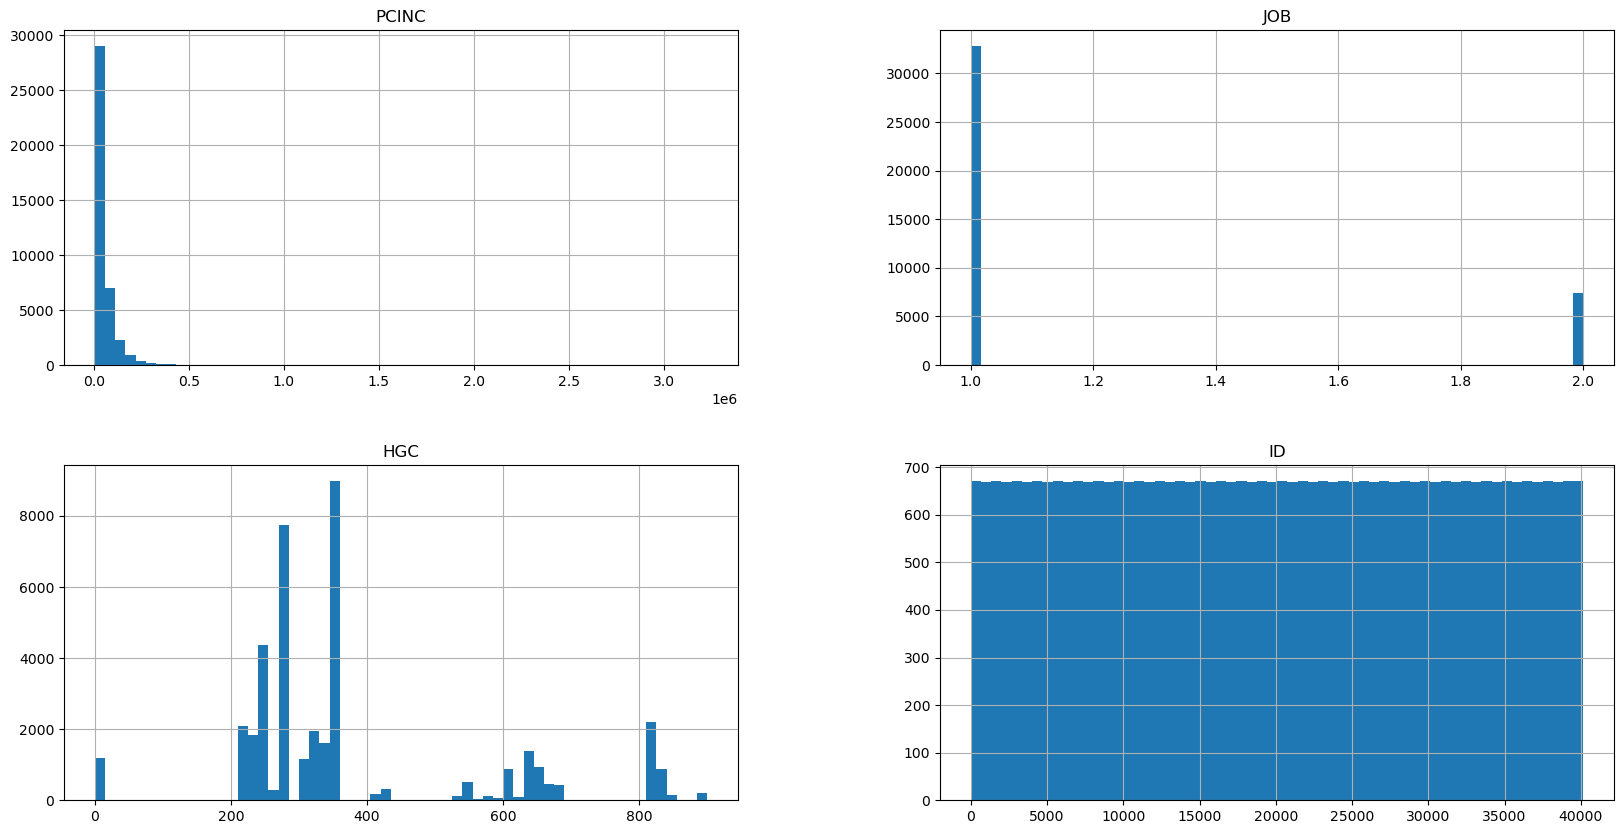

In [ ]:
class_df.hist(bins=60, figsize=(20,10))

<Axes: xlabel='ID', ylabel='PCINC'>

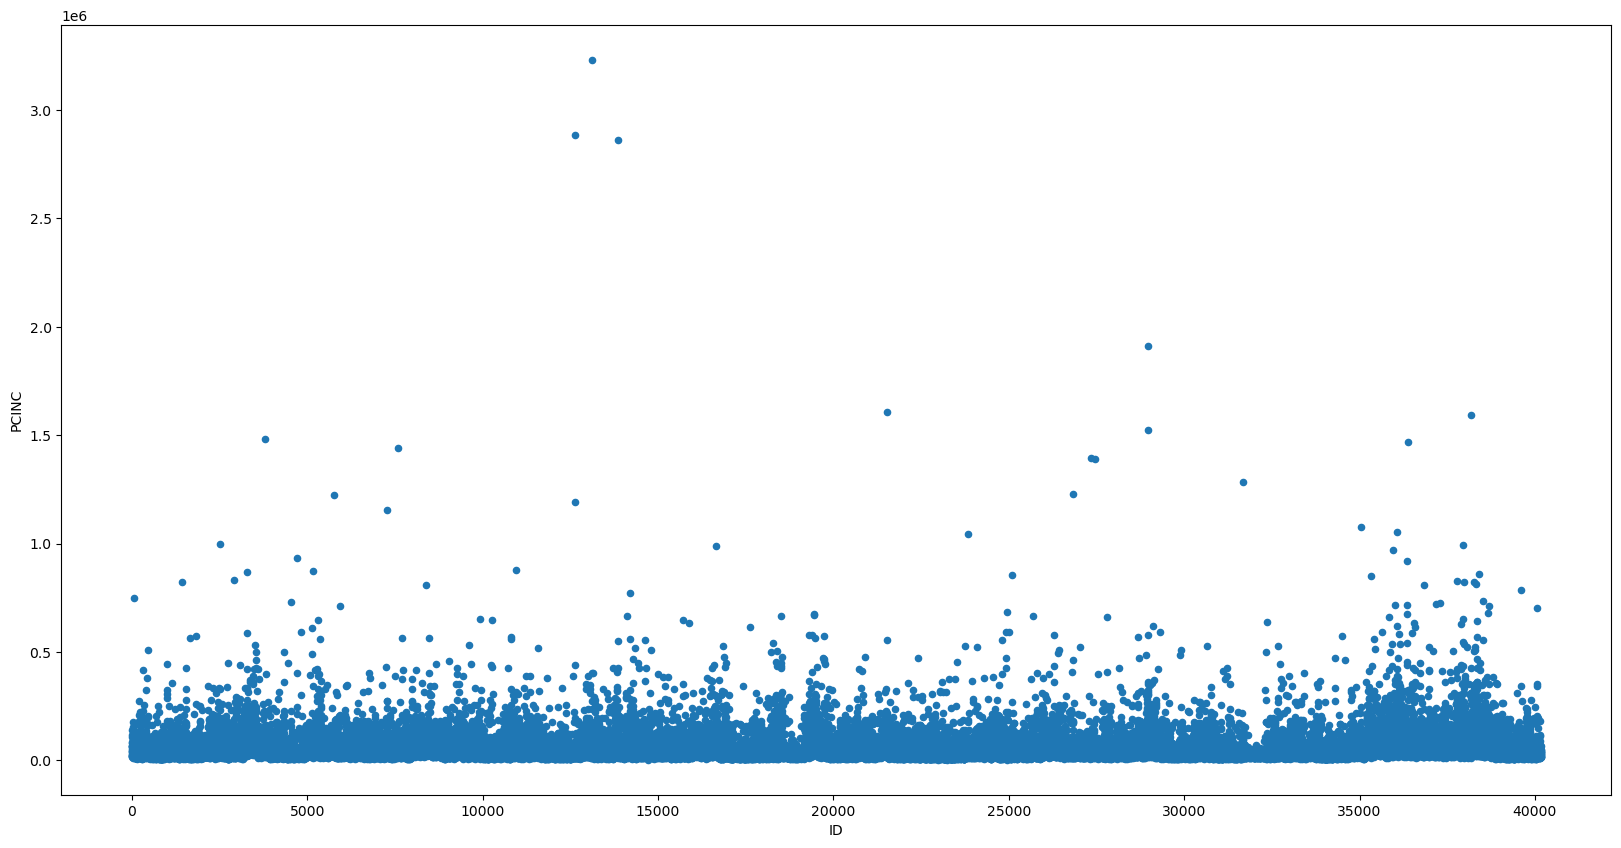

In [ ]:
class_df[["ID", "PCINC"]].plot(kind="scatter", x="ID", y="PCINC", figsize=(20,10))

In [ ]:
class_df = class_df.loc[class_df['PCINC'] <= 60000]
# we have to ask ourselves why have this per capita income thingiemajig

In [ ]:
#print(class_df["JOB"])
#print((class_df["CW"] == " "))
#class_df = class_df[class_df["CW"] != " "]
#commented everything instead


In [ ]:
#Just removing duplicates incase that their is.
class_df.drop_duplicates()


,CW,PCINC,JOB,OCCUP,HGC,ID
1,3,30631.60,1,1314,250,2
3,4,43325.75,1,6111,830,4
4,1,37481.80,1,5220,350,5
7,3,14659.17,1,6111,350,8
9,3,24732.33,1,6114,320,10
...,...,...,...,...,...,...
40166,3,30101.60,1,1314,350,40167
40167,1,14368.89,1,8321,350,40168
40168,3,19137.33,1,1314,230,40169
40169,2,30985.00,1,1120,280,40170


Splitting the data into 80% Training and 20% Testing for the classification problem.

In [ ]:
X = class_df.drop(columns=["JOB"])
y = class_df["JOB"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

# EDA

The Exploratory Data Analysis (EDA) section aims to understand the relationships between variables in the dataset, particularly how different features correlate with each other. This process helps identify patterns, dependencies, and potential issues such as multicollinearity, which can impact the performance of machine learning models.

The first part of the code calculates the correlation matrix. The printed correlation matrix provides an overview of how each variable is related to the others.

In [ ]:
corr_matrix = class_df.corr()
print(corr_matrix)

             CW     PCINC       JOB     OCCUP       HGC        ID
CW     1.000000  0.005985  0.275911 -0.321101 -0.080280 -0.007818
PCINC  0.005985  1.000000  0.112315 -0.108615  0.282812 -0.006224
JOB    0.275911  0.112315  1.000000  0.395068 -0.019619 -0.017477
OCCUP -0.321101 -0.108615  0.395068  1.000000 -0.136743 -0.016386
HGC   -0.080280  0.282812 -0.019619 -0.136743  1.000000  0.013096
ID    -0.007818 -0.006224 -0.017477 -0.016386  0.013096  1.000000


To visualize these relationships, the heatmap is generated. The visual representation makes it easier to identify strong correlations between features.

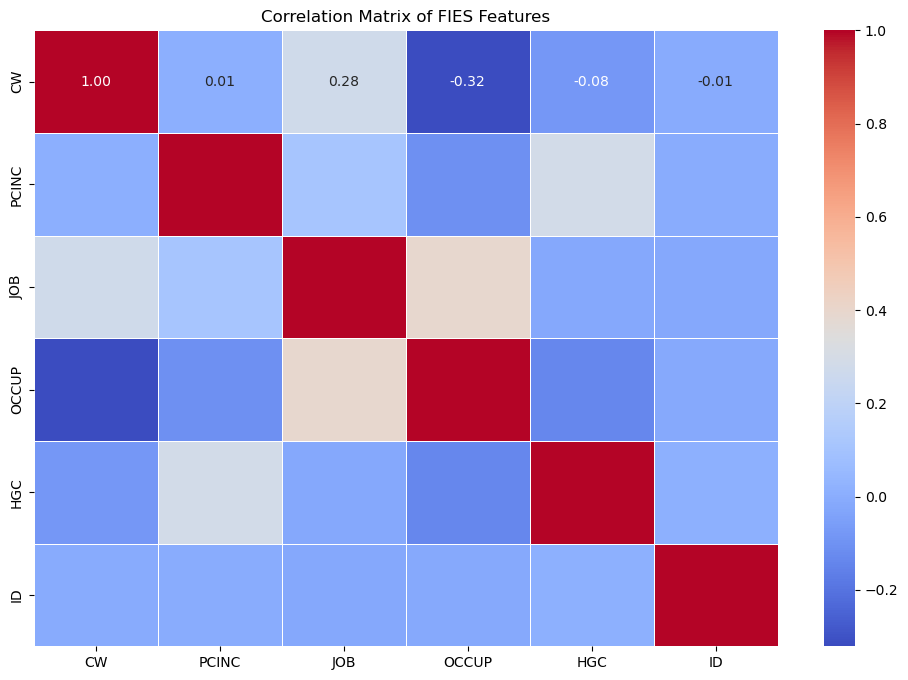

In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of FIES Features")
plt.show()

The code processes the correlation matrix into a structured table format. The threshold for strong correlations is set at 0.1 for positive and -0.1 for negative. The filtered results are then sorted and displayed separately for positive and negative correlations.

In [ ]:
# Define thresholds
positive_threshold = 0.1
negative_threshold = -0.1

# Convert correlation matrix into long format
corr_long = corr_matrix.stack().reset_index()
corr_long.columns = ["Feature 1", "Feature 2", "Correlation"]

# Remove self-correlations (Feature 1 == Feature 2)
corr_long = corr_long[corr_long["Feature 1"] != corr_long["Feature 2"]]

# Sort feature pairs alphabetically to remove duplicates
corr_long["Sorted Pair"] = corr_long.apply(lambda x: tuple(sorted([x["Feature 1"], x["Feature 2"]])), axis=1)

# Drop duplicate pairs
corr_long = corr_long.drop_duplicates(subset=["Sorted Pair"]).drop(columns=["Sorted Pair"])

# Filter positive and negative correlations
strong_positive = corr_long[corr_long["Correlation"] >= positive_threshold]
strong_negative = corr_long[corr_long["Correlation"] <= negative_threshold]

# Display tables
print("Strong Positive Correlations:")
print(strong_positive.sort_values(by="Correlation", ascending=False))

print("\nStrong Negative Correlations:")
print(strong_negative.sort_values(by="Correlation"))


Strong Positive Correlations:
   Feature 1 Feature 2  Correlation
15       JOB     OCCUP     0.395068
10     PCINC       HGC     0.282812
2         CW       JOB     0.275911
8      PCINC       JOB     0.112315

Strong Negative Correlations:
   Feature 1 Feature 2  Correlation
3         CW     OCCUP    -0.321101
22     OCCUP       HGC    -0.136743
9      PCINC     OCCUP    -0.108615


# Initial Model Training

In this section, we will train the model based on the tasks. Once again, here are the tasks to be done.
1. Classify employment status based on education level and
2. Predict food budget for different family sizes

For these, we will divide into subsections for kNN Clustering, Linear Regression and Logistic Regression.

Let us print the shape of our data and our labels for our classification task.

In [ ]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (23774, 5)
Training labels shape:  (23774,)
Test data shape:  (5944, 5)
Test labels shape:  (5944,)


Here our training data has 23774 inputs while the 5 represents the amount of features we want to see. Along with that, we have 5944 test data, again with 5 features to be utilized.

In [ ]:
#just checking the desired label we want (has job or no job)
print(pd.Series(y_train).unique())


[1 2]


### k-Nearest Neighbors Algorithm

The first of our models is the k-Nearest Neighbors Algorithm. As was discussed, the intuition behind kNN is to calculate the distance between data points given a hyperparameter k then predict. Considering we are enacting a classification task, the kNN will predict based on majority among k-neighbors. 

For now, let us show the data in our dataset highlighting the features and the associated label.

In [ ]:
print("Our data set:")
print("Features (X) \t\t Label (y)")
for i in range(len(y_train)):
    print(str(X_train.iloc[i]) + " " + str(y_train.iloc[i]))

Now, we will use `sklearn.neighbors.KNeighborsClassifier`. This will help trivialize our tasks moving forward in training the kNN model

We import first KNeighborsClassifier class then instantiate it.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = KNeighborsClassifier()

Now we will fit the data into the model

In [ ]:
kNN_model.fit(X_train, y_train)

We will now test our model by making it predict the labels of our training data.

In [ ]:
kNN_model.predict(X_train)

We can also display the feature values and corresponding distances calculated by the KNN model. We do this by first converting our dataset into NumPy array because `scikit-learn` expects NumPy arrays as input. This will make it easier for us to utilize our KNN model.

In [ ]:
kNN_model.fit(X_train, y_train)
kNN_model.predict(X_train)

In [ ]:
#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()

In [ ]:
neighbors = 5

(distances, data_index) = kNN_model.kneighbors(X_train, neighbors)

distances = distances[:, 1:]
data_index = data_index[:, 1:]

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=2) 

print("The " + str(neighbors) + " nearest neighbors:")
for i in range(neighbors):
    print(i + 1, np.around(X_train[data_index[i]], 2), "\t dist: "+ str(np.around(distances[i], 2)))

Here, we display the nearest neighbors for each data point along with their distances to other points. Although we specified five neighbors, only four are shown because we excluded the closest one, which is typically the data point itself.

Now, let us train a KNN model with a set hyperparameter `k`, which serves as the number of neighbors the model will look at for predictions. For now, we will set k = 5.

In [ ]:
kNN_model = KNeighborsClassifier(n_neighbors = 5)

We will now fit the data and then store the predictions from the test data to `y_predicted`.

In [ ]:
kNN_model.fit(X_train, y_train)
y_predicted = kNN_model.predict(X_test)

Let us now look at the performance of our KNN model by looking at the Accuracy Score of our predictions `y_predicted` against the ground truth values `y_test`

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_predicted))
print("Accuracy Score (Predictions):", accuracy_score(y_test, y_predicted))

The model correctly predicted approximately 84% of the test data. While this is a high accuracy, there is still room for improvement. To enhance performance, we can fine-tune the value of k and apply standardization to the data.

In [ ]:
#TODO
    #HYPERPARAMETER TUNING

In [ ]:
#TODO
    #STANDARDIZATION

### Logistic Regression

Considering that all of our data have different numeric values. It's important that have standerdized to the same scale, to prevent any dominant features from overpowering the smaller one.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10, shuffle=True, random_state=13)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

After any preprocessing, we used a K-fold cross-validation to evaluate the perforamnce of LG model on our training data. We want to calculate the F1-score and Accuracy.

In [ ]:
model = LogisticRegression(random_state=11)
f1_scores = cross_val_score(model, X_train_scaled, y_train, scoring='f1', cv=kf)
accuracy_scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=kf)

print(f"Average F1-score: {np.mean(f1_scores)}")
print(f"Average Accuracy: {np.mean(accuracy_scores)}")

Average F1-score: 0.982288812736166
Average Accuracy: 0.970513945496033


Model is trained using the scaled training data. After training, the model predicts labels for the scaled test set. We want to train the model once and then evaluate it on a separate test set. 

In [ ]:
model.fit(X_train_scaled, y_train)
y_predicted = model.predict(X_test_scaled)

In [ ]:
f1_test = f1_score(y_test, y_predicted)
accuracy_test = accuracy_score(y_test, y_predicted)

print(f"F1-score: {f1_test}")
print(f"Accuracy: {accuracy_test}")

F1-score: 0.9795094377712728
Accuracy: 0.9658479138627187


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4852  203]
 [   0  889]]


In [ ]:
y_pred_series = pd.Series(y_pred)

print(y_pred_series.value_counts())
print(y_test.value_counts())

1    4852
2    1092
Name: count, dtype: int64
JOB
1    5055
2     889
Name: count, dtype: int64


### Neural Network

In this subsection, we will create a neural network model. Now, let us just first set the theoretical knowledge we are given. We have 5 we want to look at, therefore we have 5 input nodes. Then, we have a classification task. Considering that there is only an output of whether someone is predicted to have a job or not.

Now, to formally start, we will first import the necessary libraries for creating a neural network. The one we will use is torch.

In [ ]:
import torch.optim as optim
import torch.nn as nn
import numpy as np
import torch

Next, we will now convert our train and test data to torch tensor. However before that, a little bit more preprocessing.

In [ ]:
X_train.dtypes

As seen, CW and OCCUP are object datta types even though they are integers according to the dictionary. It is imperative that there are no object datatypes for what we will tackle in neural network

In [ ]:
X_train[["CW", "OCCUP"]] = X_train[["CW", "OCCUP"]].astype(int)
X_train.shape

X_test[["CW", "OCCUP"]] = X_test[["CW", "OCCUP"]].astype(int)

Now let us just confirm that we do have them as int datatypes instead of objects to allow tensor conversion.

In [ ]:
X_train.dtypes

Afterwards, we can now convert to tensors.

In [ ]:

X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32)

X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32)



Lastly, we need to make some slight modifications to y_train_torch and y_test_torch. Consider that in a binary classification task, there are only two possible outputs, 0 and 1. According to the dictionary, there is an output of 1 or 2 in the JOB column. As such, we will convert 2, the one to signify that someone does NOT have a job, to 0./

In [ ]:
y_train_torch = (y_train_torch == 1).float()
y_test_torch = (y_test_torch == 1).float()

We will use these converted data and feed it into our neural network. As for the neural network, we will set up the size of our network, then initiailize the weights, do forward propagation then get the classification predictions.

We have a neural_network.py file that will help us to do our neural network.

In [ ]:
from src.neural_network import NeuralNetwork

Then we instantiate a NeuralNetwork object

In [ ]:
network = NeuralNetwork(input_size=5, num_classes=2, list_hidden=[128, 64, 32], activation="sigmoid")

In [ ]:
network.create_network()

We will now apply weights. 

In [ ]:
network.init_weights()
print(network.layers[0].weight)

Now let us see the bias term of the network layers

In [ ]:
print(network.layers[0].bias)

Next step is to do forward propagation. Here, forward propagation computes the output of probabilities. The intuition behind this is that a neuron can either be 0 or 1.

First let us get the probabilities of our training data

In [ ]:
probabilities = network.forward(X_train_torch)

In [ ]:
print(probabilities)

Afterwards we will get the prediction.

In [ ]:
predictions = network.predict(probabilities)
print(predictions)

Lets try this on 10 random indices so we may view this in that manner instead of around 40 thousand instances.

Firstly, we get 10 random training instances.

In [ ]:
np.random.seed(10)
random_indices = np.random.randint(X_train_torch.shape[0], size=10)
print('Random indices: ', random_indices)

Then we get the scores and probabilities.

In [ ]:
# Write your code here
X_rand = X_train_torch[random_indices]
probabilities = network.forward(X_rand)

In [ ]:
print(probabilities)

In [ ]:
predictions = network.predict(probabilities)
print(predictions)

Now let us do the same for our test data.

Let us first get some random 10 so at least we do not have to try to load the entirety of the dataset

In [ ]:
np.random.seed(10)
random_indices = np.random.randint(X_test_torch.shape[0], size=10)
print('Random indices: ', random_indices)

Now we do our forward propagation

In [ ]:
X_rand = X_test_torch[random_indices]
probabilities = network.forward(X_rand)

In [ ]:
print(probabilities)


Here we have the predictions after the probabilities. These are supposedly predicted to be all class 1.

In [ ]:
predictions = network.predict(probabilities)
print(predictions)

Checking for Loss

In [ ]:
criterion = nn.BCEWithLogitsLoss()

In [ ]:
target_classes = y_train_torch[random_indices]
target_classes = (target_classes == 1).float()
target_classes = target_classes.view(-1, 1)

In [ ]:
loss = criterion(probabilities, target_classes)
# target_classes

In [ ]:
print('Loss: {:.4f}'.format(loss.item()))

After knowing the loss, we now proceed to do backwards propagation. PyTorch has a function called `backward()` in the loss module to perform backwards propagation.

For our optimizer we will use <strong>Adam</strong>. Adam is an optimization algorithm that is essentially an extension of a classical stochastic gradient descent.

As described by Kingma and Ba in their 2015 ICLR paper titled [<b>"Adam: A Method for Stochastic Optimization"</b>](https://arxiv.org/abs/1412.6980),  Adam computes individual adaptive learning rates for different parameters from estimates of first (the mean), and second (uncentered variance) moments of the gradients.

In [ ]:
optimizer = optim.Adam(network.parameters(), lr = 0.001)

With this code done above, we have instantiated an optimizer object with `optim.Adam`. Here `params` refers to the parameters we have set for our network. `lr` is the learning rate, in which is set to 0.001

Afterwards, we empty the gradients of the network

In [ ]:
optimizer.zero_grad()

Then we compute the gradients on the backward propagation.

In [ ]:
loss.backward()

After computing the gradients based on backward propagation, we then update the weights.

In [ ]:
optimizer.step()

All that was done beforehand, as can be noticed, was only done on a few items from the dataset that was randomly picked. This was only done for posterity, making sure that we have appropriately applied the functions and thoroughly discussed them. 

To actually use the entirety of the dataset, we will utilize a <b>Mini-Batch Gradient Descent</b>.

#### Mini-Batch Gradient Descent 
<!-- I think this should be in improving model performance instead -->

Considering the size of the dataset, we can use a mini-batch gradient descent in training the data. This ensures we have speed while also having stability.

To start, we must import a `DataLoader` class. This class allows us to set our X and y data into batches.

In [ ]:
from data_loader import DataLoader

Afterwards, we instantite a `DataLoader` object. Here we will pass into the parameters our X and y training data. As for batch size, the most common are 32, 64 and 128 which are based on hardware capabilities. To allow most hardware with least strain, let us use 32. 

In [ ]:
data_loader = DataLoader(X_train.numpy(), y_train.numpy(), 32)

It is noticed that we have converted the X and y data into numpy. According to class initialization, the DataLoader class takes in a numpy parameter, thus the necessity to make sure it is in numpy.

Now, to train the network with Mini-Batch Gradient Descent

In [ ]:
e = 0
max_epochs = 400
is_converged = False
previous_loss = 0
losses = []

# For each epoch
while e < max_epochs and is_converged is not True:
    
    current_epoch_loss = 0
    
    # TODO: Get the batch for this epoch.
    X_batch, y_batch = data_loader.get_batch(mode='train')
    
    # For each batch
    for X, y in zip(X_batch, y_batch):
        X = torch.Tensor(X)
        y = torch.Tensor(y).to(torch.long)
        
        # TODO: Empty the gradients of the network.
        optimizer.zero_grad()
        
        # TODO: Forward propagation
        probabilities = network.forward(X)
        
        # TODO: Compute the loss
        loss = criterion(probabilities, y)
        
        # TODO: Backward propagation
        loss.backward()
        
        # TODO: Update parameters
        optimizer.step()
        
        current_epoch_loss += loss.item()
    
    average_loss = current_epoch_loss / len(X_batch)
    losses.append(average_loss)
    
    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss: {:.6f}'.format(average_loss))
    
    if abs(previous_loss - loss) < 0.00005:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

# Error Analysis

### Detecting Overfitting in Logistic Regression Model

Considering that out training of our model had a high accuracy and f1-score we have to make sure that our is not overfitting.

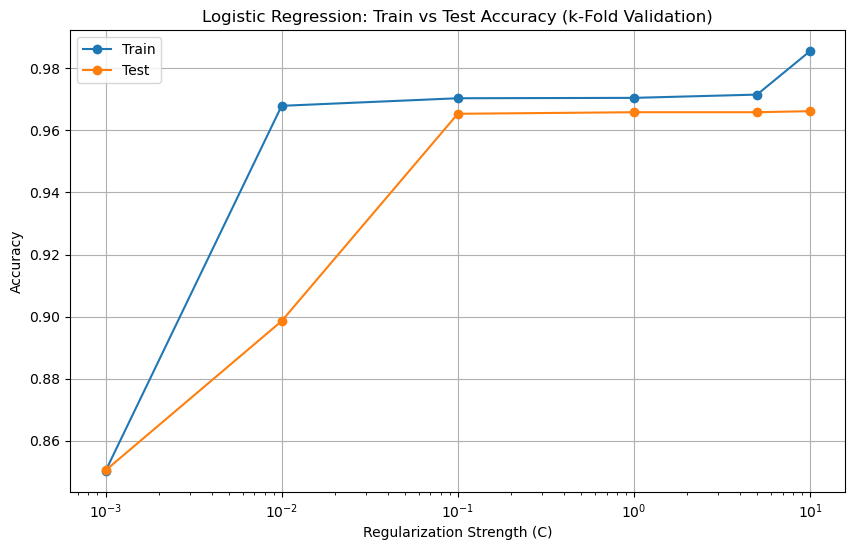

In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 5, 10]
train_scores = []
valid_scores = []
k = 5 

for C in C_values:
    model = LogisticRegression(C=C, random_state=11)

    train_score = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=k))
    valid_score = np.mean(cross_val_score(model, X_test_scaled, y_test, cv=k))

    train_scores.append(train_score)
    valid_scores.append(valid_score)

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train', marker='o')
plt.plot(C_values, valid_scores, label='Test', marker='o')
plt.xlabel('Regularization Strength (C)')
plt.title('Logistic Regression: Train vs Test Accuracy (k-Fold Validation)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

The plot shows that as C increases, both train and test accuracy improve, suggesting reduced underfitting. Since the two curves remain close, the model generalizes well without significant overfitting. The best C value balances high test accuracy with minimal train-test gap.

To further analyze our model we have to find the RMSE, MAE, and R^2

In [ ]:
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

RMSE: 0.18480283043633636
MAE: 0.03415208613728129
R² Score: 0.7314952841577296


# Improving Model Performance

# Insights and Conclusions

# References